## 1.- Direct solution (using the normal function)

In [15]:
# page 114
import numpy as np
import matplotlib.pyplot as plt

X = 2* np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) # function we want to use plus noise

In [16]:
X_b = np.c_[np.ones((100,1)), X] # Add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # THIS IS THE NORMAL FUNCTION

In [17]:
print(theta_best) # see how close we came to 4 + 3*X, considering the noise

[[4.03630126]
 [2.91411094]]


In [18]:
# making predictions
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.03630126]
 [9.86452315]]


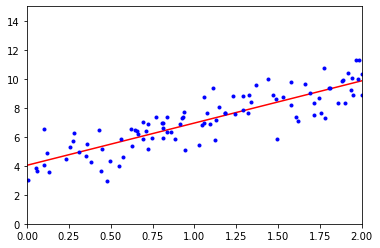

In [19]:
# plotting the results
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## 2.- Using Scikit-Learn

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  [4.03630126]
Coefficient:  [[2.91411094]]


In [21]:
# use the fitted linear regression to predict

print(lin_reg.predict(X_new))

[[4.03630126]
 [9.86452315]]


## 3.- Using Batch Gradient Descent

In [24]:
# problems with this, it can be very slow as it uses the whole function 

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = (2/m)* X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[4.03630126]
 [2.91411094]]


## 4.- Using Stochastic Gradient Descent

In [25]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.034452  ]
 [2.93248143]]


In [27]:
# by using the SGD regressor alternative

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print("Intercept: ", sgd_reg.intercept_)
print("Coefficient: ", sgd_reg.coef_)

Intercept:  [4.03710708]
Coefficient:  [2.95945853]
